In [ ]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

### Image Metadata Features
- Image create date and time
- Image dimensions
- Image compression format
- Device make and model
- Image resolution and aspect ratio
- Image artist
- Flash, aperture, focal length, and exposure
#### Raw Image and Channel Pixels

In [3]:
cat = io.imread('datasets/cat.png')
dog = io.imread('datasets/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])
print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


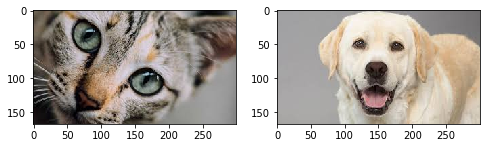

In [6]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(dog)

We can clearly see from result that we have two images of a cat and a dog having dimensions
168x300 pixels where each row and column denotes a specific pixel of the image. The third dimension
indicates these are color images having three color channels. Let’s now try to use numpy indexing to slice out
and extract the three color channels separately for the dog image.

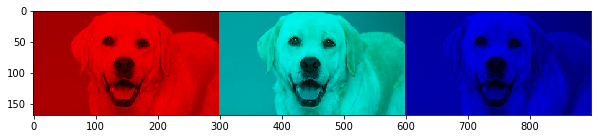

In [7]:
dog_r = dog.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0
dog_g = dog.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0
dog_b = dog.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [9]:
dog_r[:,:,0]

Array([[160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       ...,
       [165, 165, 165, ..., 212, 211, 210],
       [165, 165, 165, ..., 210, 210, 209],
       [164, 164, 164, ..., 209, 209, 209]], dtype=uint8)

#### Grayscale image pixel values
If you are dealing with color images, it might get difficult working with multiple channels and
three-dimensional arrays. Hence converting images to grayscale is a nice way of keeping the necessary pixel
intensity values but getting an easy to process two-dimensional image. Grayscale images usually capture the
luminance or intensity of each pixel such that each pixel value can be computed using the equation

$Y = 0.2125 \times R + 0.7154 \times G + 0.0721 \times B$

Where R, G & B are the pixel values of the three channels and Y captures the final pixel intensity
information and is usually ranges from 0(complete intensity absence - black) to 1(complete intensity
presence - white). The following snippet shows us how to convert RGB color images to grayscale and extract
the raw pixel values, which can be used as features.

In [12]:
from skimage.color import rgb2gray
cgs = rgb2gray(cat)
dgs = rgb2gray(dog)
print('Image shape:', cgs.shape, '\n')
# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')
# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300) 

2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


#### Binning image intensity distribution

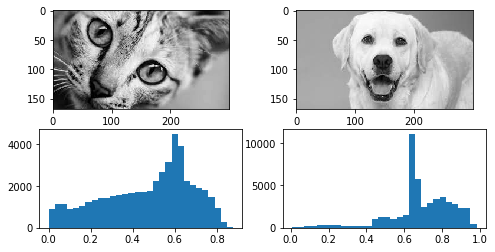

In [16]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

### Image Aggregation Statistics
#### RGB ranges